In [22]:
from pathlib import Path
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data_path = "../data"
data_splits = ["train", "val", "test"]
data_labels = ["NORMAL", "PNEUMONIA"]

### 1. Evaluate dataset size

In [4]:
# count the number of images in the dataset
records = pd.DataFrame(columns=["split", "label", "num_images"])

for split in data_splits:
    for cat in data_labels:
        path = Path(data_path) / split / cat
        count = len(list(path.glob("*.jpeg")))
        df = pd.DataFrame([{
            "split": split,
            "label": cat,
            "num_images": count
        }])
        records = pd.concat([records, df], ignore_index=True)

In [5]:
records

,split,label,num_images
0,train,NORMAL,1341
1,train,PNEUMONIA,3875
2,val,NORMAL,8
3,val,PNEUMONIA,8
4,test,NORMAL,234
5,test,PNEUMONIA,390


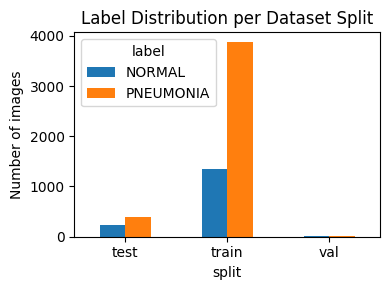

In [9]:
pivot = records.pivot(index="split", columns="label", values="num_images")

pivot.plot(
    kind="bar",
    figsize=(4, 3),
    title="Label Distribution per Dataset Split"
)

plt.ylabel("Number of images")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2. Check image examples 

In [ ]:
# get exampole images in the dataset
def show_samples(split, cls, n=6):
    path = Path(data_path) / split / cls
    images = list(path.glob("*.jpeg"))
    samples = random.sample(images, n)

    plt.figure(figsize=(8, 2))
    for i, img_path in enumerate(samples):
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")

    plt.suptitle(f"{split.upper()} - {cls}")
    plt.show()

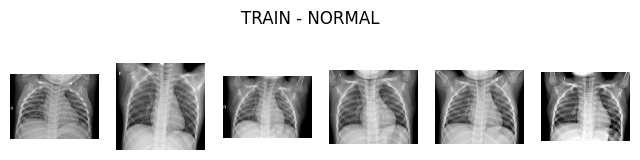

In [ ]:
# train dataset images - NORMAL class
show_samples("train", "NORMAL")

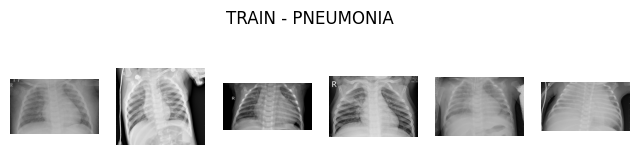

In [ ]:
# train dataset images - PNEUMONIA class
show_samples("train", "PNEUMONIA")